In [1]:
# data 시각화 라이브러리 import 하기
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# Python 데이터 분석 패키지 Pandas 불러오기
import pandas as pd

In [6]:
# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

#### 데이터 불러오기

In [3]:
df = pd.read_csv('./data/event_log.csv')

In [4]:
# 상위 데이터 불러오기
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


#### 기본적인 데이터 살펴보기

In [7]:
len(df)
# 데이터 정보
df.info()

885129

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [12]:
# 숫자형 컬럼의 중앙값과 평균 값 살펴보기
df[['price']].describe()
# 최솟값 보기
df.min()
# 최댓값 보기
df.max()

,price
count,885129.000000
mean,146.328713
std,296.807683
min,0.220000
25%,26.460000
50%,65.710000
75%,190.490000
max,64771.060000


event_time     2020-09-24 11:57:06 UTC
event_type                        cart
product_id                         102
category_id        2144415921001726020
price                             0.22
user_id            1515915625353226922
dtype: object

event_time     2021-02-28 23:59:09 UTC
event_type                        view
product_id                     4183880
category_id        2227847332769039290
price                          64771.1
user_id            1515915625611024030
dtype: object

## Active User 살펴보기

##### 달별, 주별, 일별 시간에 따른 유저수 변화 살펴 보기

* Active User 의 기준: 아래 중 1가지의 행동을 한 유저 (user_id)
  * view(상품 보기)
  * cart(장바구니 담기)
  * remove_from_cart(장바구니에서 제거하기)
  * purchase (구매하기)

### Daily Active User

In [15]:
# 날짜 전처리하기
df['event_date'] = df['event_time'].str.slice(start=0, stop=10)
df['event_date_format'] = pd.to_datetime(df['event_date'], format = '%Y-%m-%d')

# 임의로 10월 1일부터 2월 28일 데이터로 만들기
df = df.loc[(df['event_date'] > '2020-09-30')]

In [16]:
# 날짜 별 unique user 수 계산하기
df_1 = df.groupby('event_date')['user_id'].nunique()

In [24]:
# daily user data 만들기
dau_data = pd.DataFrame({'event_date':df_1.index, 'user_count':df_1.values})

In [21]:
dau_data.describe()

# 평균 2980명 정도 방문하고, 중앙값은 2940 이다

,user_count
count,151.000000
mean,2984.854305
std,472.763921
min,1370.000000
25%,2683.500000
50%,2943.000000
75%,3308.500000
max,4287.000000


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, '일자 별 유저수 변화(Daily Active User)')

Text(0.5, 0, '일자')

Text(0, 0.5, '유저수')

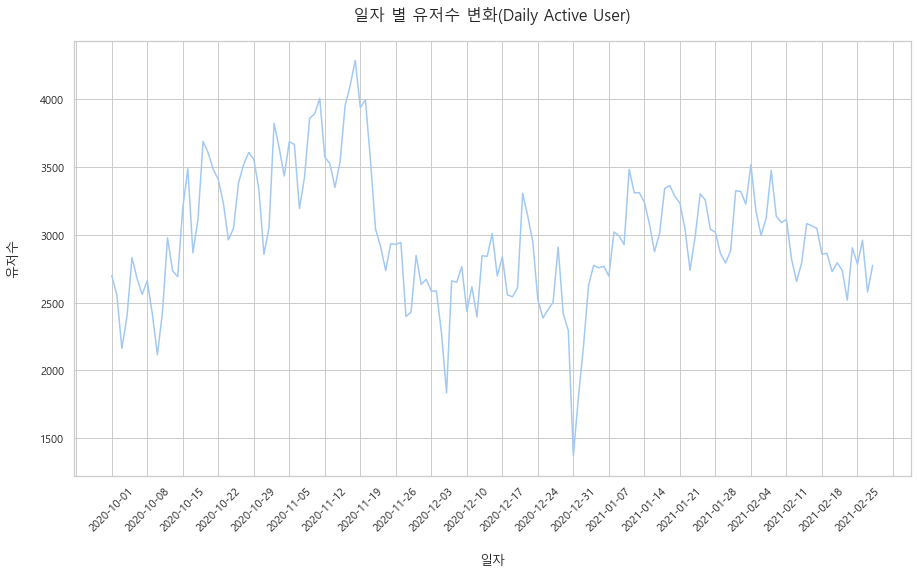

In [37]:
sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다
plt.rc('font', family='Malgun Gothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X 라벨의 글씨를 회전한다.

g = sns.lineplot(x='event_date', y='user_count', data=dau_data) # line 차트 그래프를 그린다
g.figure.set_size_inches(15, 8) # 그래프의 크기를 키운다
g.xaxis.set_major_locator(ticker.MultipleLocator(7)) # 축의 간격을 7배로 설정한다
g.set_title("일자 별 유저수 변화(Daily Active User)", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정합니다.

g.set_xlabel("일자",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
g.set_ylabel("유저수",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.

### Monthly Active User

In [41]:
# 날짜 뽑기 (연도-월)
df['event_month'] = df['event_time'].str.slice(start=0, stop=7)

# 날짜 별 unique user 수 계산하기
df_2 = df.groupby('event_month')['user_id'].nunique() 

# Series 를 Dataframe 으로 변환하기
mau_data = pd.DataFrame({'event_month':df_2.index, 'user_count':df_2.values})

In [43]:
# 평균 80963이고 중위값은 81256
mau_data.describe()

,user_count
count,5.000000
mean,80963.000000
std,8130.149937
min,72137.000000
25%,74606.000000
50%,81256.000000
75%,84216.000000
max,92600.000000


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, '월별 유저수 변화(Monthly Active User)')

Text(0.5, 0, '연도-월')

Text(0, 0.5, '유저수')

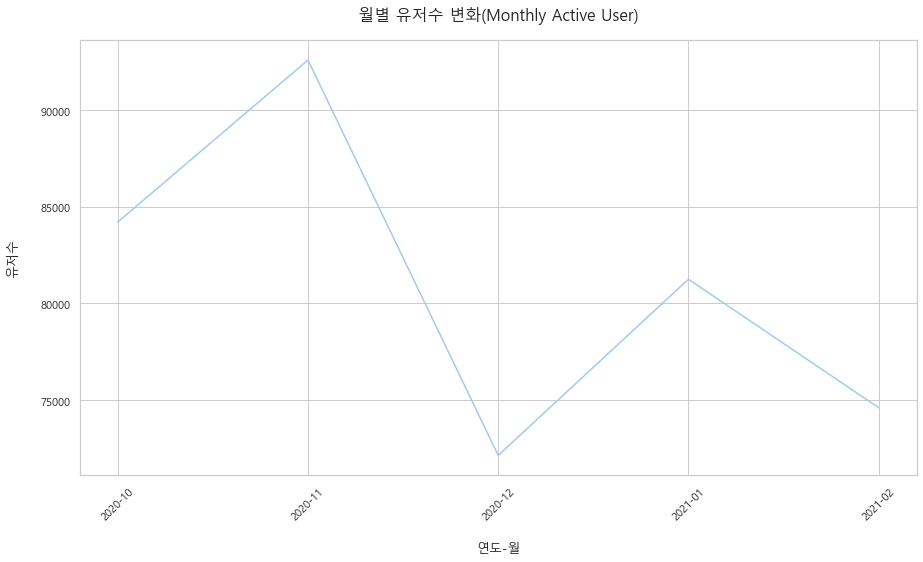

In [44]:
sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다
plt.rc('font', family='Malgun Gothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X 라벨의 글씨를 회전한다.

g = sns.lineplot(x='event_month', y='user_count', data=mau_data) # line 차트 그래프를 그린다
g.figure.set_size_inches(15, 8) # 그래프의 크기를 키운다
g.set_title("월별 유저수 변화(Monthly Active User)", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정합니다.

g.set_xlabel("연도-월",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
g.set_ylabel("유저수",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.


# 아무래도 daily 가 줄어들었기 떄문에, monthly 또한 2021년에 갈수록 줄어드는 추세이다. (10, 11월이 peak!)
# 하지만 전체 데이터를 보지 않았기 때문에 seasonal effect 인지, 유저수가 감소한 것인지 완전히 단정할 수 없다
# 전자제품 쇼핑몰의 특성도 존재할 것이다.

### DAU / MAU 구하기

##### 한 유저가 한달을 기준으로 얼마나 자주 들어오는 서비스인지 판단하는 지표

In [45]:
# daily user 수 
dau_data.user_count.mean()

# monthly user 수
mau_data.user_count.mean()

2984.8543046357618

80963.0

In [46]:
avg_daily_user = dau_data.user_count.mean()
avg_month_user = mau_data.user_count.mean()

dau_mau_ratio = avg_daily_user/avg_month_user
print(dau_mau_ratio)

# 한 유저가 1달을 기준으로 다시 방문하는 지표가 3%이다
# 전자제품 특성상 구매주기가 길 수 있고
# 새로운 유저들이 주로 구매하고, 
# 1달 안에 재방문하는 유저들이 거의 없다.

0.03686689357651966
